# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [20]:
import pandas as pd
import seaborn as sns 
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [6]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

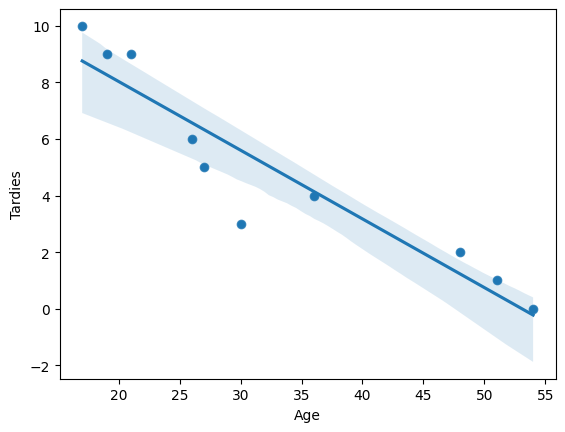

In [34]:
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"]);
sns.regplot(x="Age", y="Tardies", data=student_data, ci= 95);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# H0: There is no relationship between Age and Tardiness 
# H1: There is a negative correlation between Age and Tardiness

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [13]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [14]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [ ]:
# Covariance shows you the direction of the relationship between variables, 
# whereas correlation shows you the strength of that relationship.
# Correlation of -0.94 tells us that the variables are negatively correlated. 
# Covariance of -45.57 tells us that the direction of the relationship is negative. 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [24]:
X = student_data[["Age"]] #Double brackets for scikit-learn
y = student_data["Tardies"]

lr = LinearRegression()

lr.fit(X, y)

student_data["prediction"] = lr.predict(X)

mae = metrics.mean_absolute_error(student_data.Tardies, student_data.prediction)
mse = metrics.mean_squared_error(student_data.Tardies, student_data.prediction)
rmse = np.sqrt(metrics.mean_squared_error(student_data.Tardies, student_data.prediction))
r2 = metrics.r2_score(student_data.Tardies, student_data.prediction)
print(f'mae: {mae}, mse: {mse}, rmse: {rmse}, r2: {r2}')



mae: 0.9319083427082718, mse: 1.3319201847356268, rmse: 1.1540884648655088, r2: 0.8820265558250109


In [26]:
results = smf.ols("Tardies ~ Age", data=student_data).fit()
results.summary()

/opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           5.57e-05
Time:                        15:32:38   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

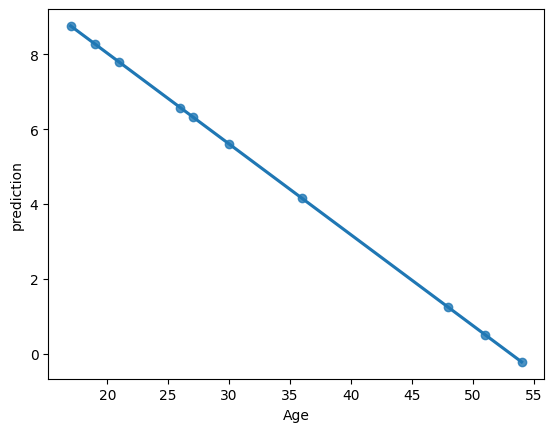

In [33]:
sns.scatterplot(x=student_data["Age"], y=student_data["prediction"]);
sns.regplot(x="Age", y="prediction", data=student_data, ci= 95);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Age is negatively correlated with tardies (corr= -0.94, cov= -46). The model represents about 88% 
# of variance (r2= 0.882, p < 0.05). Therefore, age is a good predictor for tardiness. The older the person, the 
# less likely they are to be tardy. 
# Reject null

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [42]:
cars= pd.read_csv('./vehicles.csv')
cars.sample()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
28936,Pontiac,Torrent FWD,2009,3.6,6.0,Automatic (S6),Front-Wheel Drive,Sport Utility Vehicle - 2WD,Regular,17.347895,17,24,19,467.736842,1750


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [52]:
cars_= cars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
cars_.corr()
# Best at predicting CO2 Emission: Cylinders, FUEL Barrels, Combined MPG, Fuel Cost/Year
# Worst at predicting: Year 


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [53]:
cars_.cov()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,101.713065,1.459896,-9.960687,10.556963,-469.934524,-266.928999
Cylinders,1.459896,3.080967,5.798763,-6.269421,692.437947,157.237699
Fuel Barrels/Year,-9.960687,5.798763,19.956615,-20.777227,2074.962381,524.532182
Combined MPG,10.556963,-6.269421,-20.777227,26.136725,-2268.286203,-563.783910
Fuel Cost/Year,-469.934524,692.437947,2074.962381,-2268.286203,257007.049913,56185.983710
CO2 Emission Grams/Mile,-266.928999,157.237699,524.532182,-563.783910,56185.983710,14175.467724


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [69]:
cars_.rename(columns={'CO2 Emission Grams/Mile': 'CO2EmissionGramsMile',
                   'Fuel Barrels/Year': 'FuelBarrelsYear', 
                    'Combined MPG': 'CombinedMPG', 
                     'Fuel Cost/Year': 'FuelCostYear'},
          inplace=True)

/opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
results1 = smf.ols("CO2EmissionGramsMile ~ Cylinders + FuelBarrelsYear + CombinedMPG + FuelCostYear", data=cars_).fit()
results2.summary()
# Will remove Year because its not very correlated to CO2 emissions and its correlation is probably only due to noise by looking at the pairplot.
# Won't remove anything else bc Adj. R-squred = R-squared and all p-values are less than 0.05. No st errors
# are shockingly higher/ lower than their coefficients so multicolinearity unlikely. 


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     CO2EmissionGramsMile   R-squared:                       0.980
Model:                              OLS   Adj. R-squared:                  0.980
Method:                   Least Squares   F-statistic:                 4.470e+05
Date:                  Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                          16:34:15   Log-Likelihood:            -1.5226e+05
No. Observations:                 35952   AIC:                         3.045e+05
Df Residuals:                     35947   BIC:                         3.046e+05
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         131.1563      1.688     77.714      0.000     127.848     134.464
Cylinders           1.0448      0.080     12.993      0.000       0.887       1.202
FuelBarrelsYear    19.6271      0.060    329.809      0.000      19.510      19.744
CombinedMPG        -3.1666      0.043    -73.810      0.000      -3.251      -3.082
FuelCostYear        0.0294      0.000     61.102      0.000       0.028       0.030
==============================================================================
Omnibus:                    72407.687   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274852352.971
Skew:                          16.589   Prob(JB):                         0.00
Kurtosis:                     430.058   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

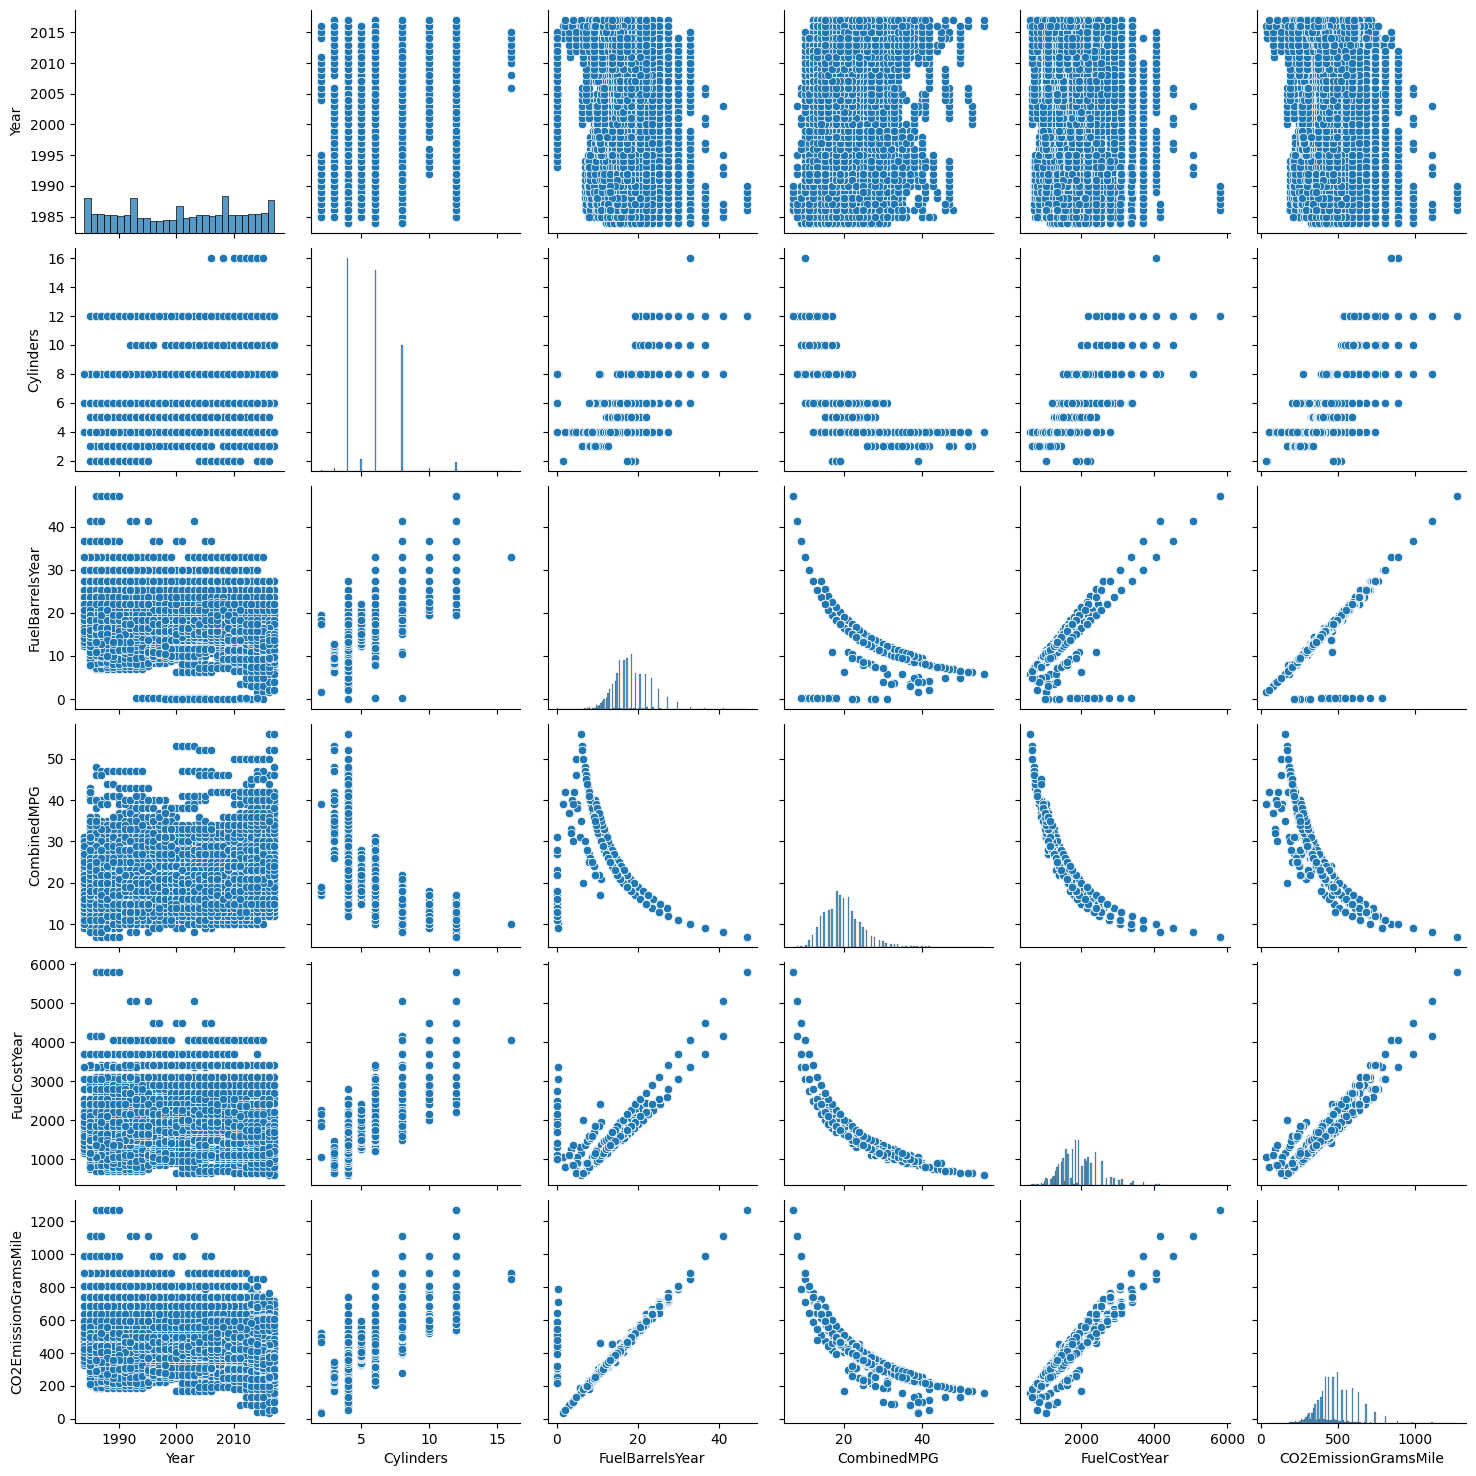

In [80]:
sns.pairplot(cars_);
# It is likely a non-linear model would be better model for predicting relationship w/ Combined MPG 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Most important variables in the model include: Fuel Barrels/Year, CombinedMPG, and FuelCost/Year
# Conclusions: 
# The more cylinders, the more CO2 emissions/mile. 
# The more fuel/barrels/year the more CO2 emissions /mile(obviously)
# The less combined MPG, the less CO2 emissions/mile (obviously)
# The higher the fuel cost per year, the more Co2 emissions / mile (surprisingly)
# With an R2 of 0.98 and p-values all less than 0.05, we can be confident about our concluions 


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [88]:
dat = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

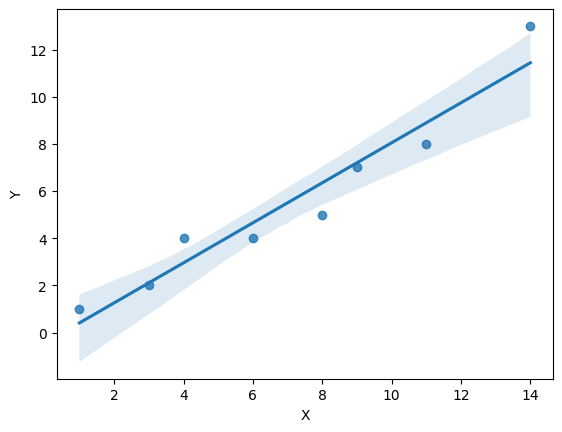

In [101]:
sns.regplot(x="X", y="Y", data=dat, ci= 95);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [93]:
# It looks like a positively correlated linear relationship 
results3 = smf.ols("Y ~ X", data=dat).fit().summary()
results3

/opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           0.000102
Time:                        17:03:44   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.584      -2.297       1.418
X              0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

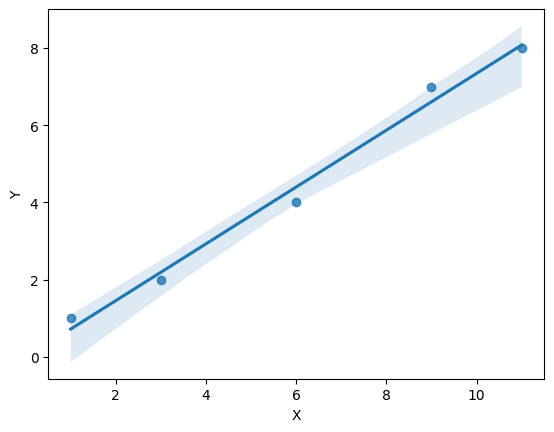

In [106]:
sns.regplot(x="X", y="Y", data=dat2, ci= 95);

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [105]:
dat2 = pd.DataFrame({'X': [1,3,6,9,11], 'Y': [1,2,4,7,8]})
dat2
results4 = smf.ols("Y ~ X", data=dat2).fit().summary()
results4

/opt/anaconda3/envs/Ironhack/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     253.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           0.000539
Time:                        17:14:35   Log-Likelihood:               -0.99176
No. Observations:                   5   AIC:                             5.984
Df Residuals:                       3   BIC:                             5.202
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0118      0.325     -0.036      0.973      -1.047       1.024
X              0.7353      0.046     15.918      0.001       0.588       0.882
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.564
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.471
Skew:                           0.082   Prob(JB):                        0.790
Kurtosis:                       1.505   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# R2 is much higher (0.988) without the outliers than with them (0.932). 